### OPTIMIZING MEMORY 🐼<br>

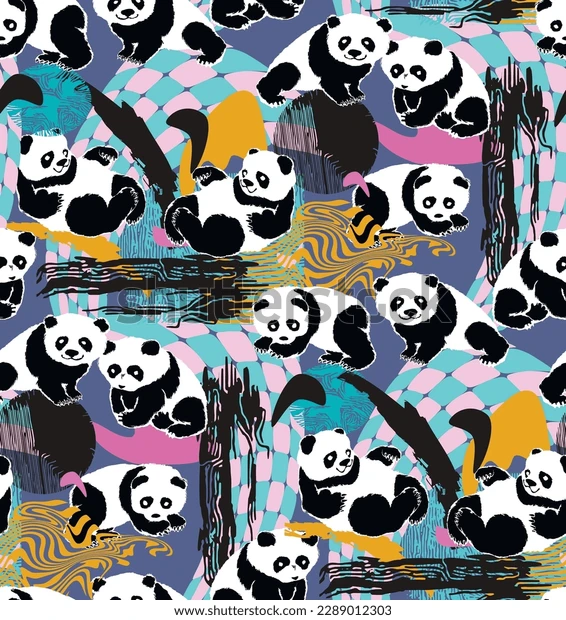
> The purpose of this notebook is to practice good memory optimization techniques to increase the performance of your code and reduce the memory fooprint of your dataset

### Kindly upvote this notebook ✔️
You can also check out my other data stories on Medium as well:
https://medium.com/@asafoadjeilisa

<br>

## Let's begin ..🎡🎢🎆

In [1]:
# EDA on the hotel reservations dataset
# https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/hotel-reservations-classification-dataset/Hotel Reservations.csv


In [3]:
import seaborn as sns
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from datetime import date
from pandas.api.types import CategoricalDtype
import plotly.io as pio
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import cufflinks as cf
from tabulate import tabulate
import  plotly.graph_objects as go
import plotly.express as px
%matplotlib inline

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

cf.go_offline()


df = pd.read_csv("/kaggle/input/hotel-reservations-classification-dataset/Hotel Reservations.csv")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
df.head(3)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled


### Create a table for attributes information 📓

In [5]:

atr_tble = [["Booking_ID","unique identifier of each booking"], 
        ["No_of_adults","Number of Adults"], 
        ["No_of_children","Number of Children" ], 
        ["No_of_weekend_nights","Number of Saturday or Sunday nights booked to stay at the hotel"],
        ["No_of_week_nights","Number of Monday to Friday nights booked to stay at the hotel"],
        ["Type_of_meal_plan","Type of meal plan booked by the customer" ],
        ["Required_car_parking_space","Code if customer requires a car parking space (0-No/1-Yes)"],
        ["Room_type_reserved","Type of room reserved by the customer, ranging from 1 to 7" ],
        ["Lead_time","Number of days between the date of booking and the arrival date" ],
        ["Arrival_year","Year of arrival date" ],
        ["Arrival_month","Month of arrival date" ],
        ["Arrival_date", "Date of the month" ],
        ["Market_segment_type","Market segment designation" ],
        ["Repeated_guest","Code if the customer is a repeated guest (0 -No/1-Yes)" ],
        ["No_of_previous_cancellations"," Number of previous bookings that were canceled by the customer prior to the current booking" ],
        ["no_of_previous_bookings_not_canceled", "Number of previous bookings not canceled by the customer prior to the current booking" ],
        ["avg_price_per_room", "Average price per day of the reservation (prices of the rooms are dynamic.- in euros)" ],
        ["no_of_special_requests","Total number of special requests made by the customer (e.g. high floor, view from the room, etc)" ],
        ["booking_status","Number of Children" ]
          ]

#define header names
col_names = ["Field", "Description"]
  
#display table
print(tabulate(atr_tble, headers=col_names, tablefmt="grid"))

+--------------------------------------+--------------------------------------------------------------------------------------------------+
| Field                                | Description                                                                                      |
+======================================+==================================================================================================+
| Booking_ID                           | unique identifier of each booking                                                                |
+--------------------------------------+--------------------------------------------------------------------------------------------------+
| No_of_adults                         | Number of Adults                                                                                 |
+--------------------------------------+--------------------------------------------------------------------------------------------------+
| No_of_children    

### Data Columns Inspection

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [7]:
df.memory_usage()

Index                                      128
Booking_ID                              290200
no_of_adults                            290200
no_of_children                          290200
no_of_weekend_nights                    290200
no_of_week_nights                       290200
type_of_meal_plan                       290200
required_car_parking_space              290200
room_type_reserved                      290200
lead_time                               290200
arrival_year                            290200
arrival_month                           290200
arrival_date                            290200
market_segment_type                     290200
repeated_guest                          290200
no_of_previous_cancellations            290200
no_of_previous_bookings_not_canceled    290200
avg_price_per_room                      290200
no_of_special_requests                  290200
booking_status                          290200
dtype: int64

## Dealing with the excess memory 🎁🎈🎊🎉
In three different scenarios, we will deal with integers,float and object/category.

🥇Our first example will be reducing the number of adults column from an int64 to an int8 data type. <br>
🥇Our second example will be reducing the average price per room column from a float64 to a float16 data type.<br>
🥇Our third example will be reducing the data type of the Booking ID column from an object to a category data type.<br>


In [8]:
# check the memory usage
print(df.no_of_adults.memory_usage(deep=True))

# convert number of adults from int64 to int8
df['no_of_adults'] = df['no_of_adults'].astype(np.int8)

# check the memory usage after conversion
print(df.no_of_adults.memory_usage(deep=True))

290328
36403


In [9]:
# check the memory usage
print(df.avg_price_per_room.memory_usage(deep=True))

# convert price from float64 to float16
df['avg_price_per_room'] = df['avg_price_per_room'].astype(np.float16)

# check the memory usage after conversion
print(df.avg_price_per_room.memory_usage(deep=True))

290328
72678


In [10]:
# check the memory usage
print(df.booking_status.memory_usage(deep=True))

# convert customer ID from object to category
df['booking_status'] = df['booking_status'].astype('category')

# check the memory usage after conversion
print(df.booking_status.memory_usage(deep=True))

2455563
36645


Thanks for Reading !!!🔫😎🍊